In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
import tensorflow as tf

# Set the weights file you downloaded into a variable
local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [4]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 17, 17, 768)


In [5]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.3)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (7, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

In [6]:
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = "categorical_crossentropy", 
              metrics = ['accuracy'])

In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

In [8]:
train_path = os.path.join(".", "rice_leaf", "train")
test_path = os.path.join(".", "rice_leaf", "validation")

In [9]:
image_train_gen = ImageDataGenerator(rescale=1./255,
      rotation_range=360,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=64,
                                                     target_size=(300,300),
                                                     class_mode='categorical')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=64,
                                               target_size=(300,300),
                                               class_mode='categorical')

Found 2519 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


In [10]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,log = {}):
    if(log.get('accuracy') >= 0.81 and log.get('val_accuracy') >= 0.81):
        print("\n Reached 85% Accuracy for both train and val.")
        self.model.stop_training = True

callbacks = MyCallback()

In [11]:
history = model.fit(train_data_gen, 
                    epochs=80, 
                    validation_data = val_data_gen, 
                    verbose = 1,
                    callbacks = [callbacks]
                   )

Epoch 1/80
40/40 [==============================] - 190s 5s/step - loss: 6.1134 - accuracy: 0.3950 - val_loss: 1.2150 - val_accuracy: 0.5286
Epoch 2/80
40/40 [==============================] - 187s 5s/step - loss: 1.0715 - accuracy: 0.5228 - val_loss: 1.1752 - val_accuracy: 0.4657
Epoch 3/80
40/40 [==============================] - 185s 5s/step - loss: 0.9739 - accuracy: 0.5713 - val_loss: 0.9271 - val_accuracy: 0.6229
Epoch 4/80
40/40 [==============================] - 184s 5s/step - loss: 0.8947 - accuracy: 0.6018 - val_loss: 0.8654 - val_accuracy: 0.6171
Epoch 5/80
40/40 [==============================] - 180s 4s/step - loss: 0.8785 - accuracy: 0.6078 - val_loss: 0.7840 - val_accuracy: 0.6486
Epoch 6/80
40/40 [==============================] - 184s 5s/step - loss: 0.8403 - accuracy: 0.6300 - val_loss: 0.7813 - val_accuracy: 0.6429
Epoch 7/80
40/40 [==============================] - 189s 5s/step - loss: 0.8129 - accuracy: 0.6280 - val_loss: 0.7296 - val_accuracy: 0.6514
Epoch 8/80
40

Epoch 59/80
40/40 [==============================] - 182s 5s/step - loss: 0.6129 - accuracy: 0.7304 - val_loss: 0.6394 - val_accuracy: 0.7257
Epoch 60/80
40/40 [==============================] - 184s 5s/step - loss: 0.6120 - accuracy: 0.7380 - val_loss: 0.6580 - val_accuracy: 0.6914
Epoch 61/80
40/40 [==============================] - 185s 5s/step - loss: 0.6136 - accuracy: 0.7273 - val_loss: 0.6048 - val_accuracy: 0.7543
Epoch 62/80
40/40 [==============================] - 181s 5s/step - loss: 0.6353 - accuracy: 0.7181 - val_loss: 0.6114 - val_accuracy: 0.7229
Epoch 63/80
40/40 [==============================] - 187s 5s/step - loss: 0.6129 - accuracy: 0.7293 - val_loss: 0.5794 - val_accuracy: 0.7486
Epoch 64/80
40/40 [==============================] - 178s 4s/step - loss: 0.5980 - accuracy: 0.7316 - val_loss: 0.7121 - val_accuracy: 0.7143
Epoch 65/80
40/40 [==============================] - 178s 4s/step - loss: 0.6141 - accuracy: 0.7388 - val_loss: 0.5871 - val_accuracy: 0.7314
Epoch 

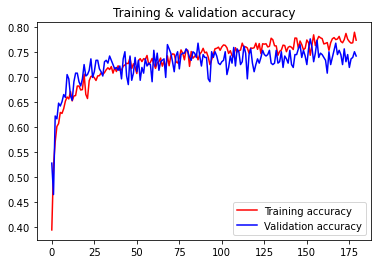

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the results
acc = np.concatenate((acc,history.history['accuracy']), axis=0)
val_acc = np.concatenate((val_acc,history.history['val_accuracy']), axis=0)

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [14]:
import pathlib
import tensorflow as tf
export_dir = './savedmodel_tl'
tf.saved_model.save(model, export_dir)

mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT
    
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter.optimizations = [optimization]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./val_acc75TFLearn.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: ./saved_model/3\assets


INFO:tensorflow:Assets written to: ./saved_model/3\assets


65962112

In [15]:
history = model.fit(train_data_gen, 
                    epochs=100, 
                    validation_data = val_data_gen, 
                    verbose = 1,
                    callbacks = [callbacks]
                   )

Epoch 1/100
40/40 [==============================] - 192s 5s/step - loss: 0.5785 - accuracy: 0.7543 - val_loss: 0.5762 - val_accuracy: 0.7514
Epoch 2/100
40/40 [==============================] - 187s 5s/step - loss: 0.6068 - accuracy: 0.7221 - val_loss: 0.6545 - val_accuracy: 0.7400
Epoch 3/100
40/40 [==============================] - 187s 5s/step - loss: 0.5786 - accuracy: 0.7519 - val_loss: 0.5961 - val_accuracy: 0.7343
Epoch 4/100
40/40 [==============================] - 186s 5s/step - loss: 0.5870 - accuracy: 0.7384 - val_loss: 0.5827 - val_accuracy: 0.7514
Epoch 5/100
40/40 [==============================] - 188s 5s/step - loss: 0.5795 - accuracy: 0.7420 - val_loss: 0.5800 - val_accuracy: 0.7486
Epoch 6/100
40/40 [==============================] - 187s 5s/step - loss: 0.5755 - accuracy: 0.7463 - val_loss: 0.5989 - val_accuracy: 0.7400
Epoch 7/100
40/40 [==============================] - 149s 4s/step - loss: 0.5867 - accuracy: 0.7352 - val_loss: 0.5609 - val_accuracy: 0.7686
Epoch 

In [6]:
import tensorflow as tf

recent_model = tf.saved_model.load('./savedmodel_tl')


ListWrapper([<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-4.59105551e-01, -4.14526574e-02, -3.62577499e-03,
          -9.87672508e-02, -3.37070860e-02,  4.79929037e-02,
           2.32542142e-01,  3.23927671e-01,  5.90160079e-02,
           9.47738215e-02,  4.24996056e-02,  1.26620471e-01,
           1.33215979e-01,  1.22741833e-01, -7.92686343e-02,
           2.08227970e-02, -1.99647829e-01, -3.02687973e-01,
          -2.10659921e-01, -3.52898419e-01, -5.58023095e-01,
           3.20223093e-01,  4.53596050e-03, -3.09266411e-02,
          -6.86957911e-02,  2.00968519e-01,  1.14542745e-01,
           2.40372881e-01,  1.52943470e-02,  5.96231259e-02,
          -5.85714653e-02,  8.78173351e-01],
         [ 3.16376328e-01, -4.78494260e-03, -6.84681814e-03,
           7.44503662e-02, -1.97458476e-01,  5.20143658e-02,
          -1.24460436e-01,  3.36123914e-01,  3.01678218e-02,
          -1.26477107e-01, -1.05597451e-01, -5.31241074e-02,
          -2.43

In [30]:
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image

def between(x):
    if x == 0:
        return "bacterial_leaf_blight"
    elif x == 1:
        return "brown_spot"
    elif x == 2:
        return "healthy"
    elif x == 3:
        return "hispa"
    elif x == 4:
        return "leaf_blast"
    elif x == 5:
        return "leaf_scald"
    elif x == 6:
        return "narrow_brown_spot"

test_path = os.path.join(".", "rice_leaf", "testing")
dirs = []
for i in os.listdir(test_path):
    path = os.path.join(test_path, i)
    files = os.listdir(path)
    for file in files:
        dirs.append(os.path.join(test_path, i, file))
n = len(dirs)
np.random.shuffle(dirs)
counter = 0
# plt.subplots(figsize=(20,n*3))
for i,fn in enumerate(dirs):
    # predicting images
    path = os.path.join(fn)
#     print(path)
    real_class = path.split("\\")[-2]
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = recent_model(images)
    print(i+1, "\t predicted : ", between(np.argmax(classes))," \t--------->\t real : ", real_class)
    if between(np.argmax(classes)) == real_class:
        counter += 1
#     plt.subplot(n//4 + 1,4,i+1)
#     plt.imshow(img)
#     plt.title("Predict : " + str(between(np.argmax(classes))) + "\nReal : " + real_class)
    
print("Accuracy : " + str(counter/n))

1 	 predicted :  bacterial_leaf_blight  	--------->	 real :  bacterial_leaf_blight
2 	 predicted :  hispa  	--------->	 real :  healthy
3 	 predicted :  healthy  	--------->	 real :  hispa
4 	 predicted :  hispa  	--------->	 real :  healthy
5 	 predicted :  healthy  	--------->	 real :  leaf_blast
6 	 predicted :  healthy  	--------->	 real :  hispa
7 	 predicted :  narrow_brown_spot  	--------->	 real :  narrow_brown_spot
8 	 predicted :  bacterial_leaf_blight  	--------->	 real :  bacterial_leaf_blight
9 	 predicted :  healthy  	--------->	 real :  healthy
10 	 predicted :  healthy  	--------->	 real :  hispa
11 	 predicted :  leaf_blast  	--------->	 real :  leaf_blast
12 	 predicted :  bacterial_leaf_blight  	--------->	 real :  bacterial_leaf_blight
13 	 predicted :  brown_spot  	--------->	 real :  brown_spot
14 	 predicted :  bacterial_leaf_blight  	--------->	 real :  bacterial_leaf_blight
15 	 predicted :  narrow_brown_spot  	--------->	 real :  narrow_brown_spot
16 	 predict

127 	 predicted :  hispa  	--------->	 real :  hispa
128 	 predicted :  healthy  	--------->	 real :  healthy
129 	 predicted :  narrow_brown_spot  	--------->	 real :  narrow_brown_spot
130 	 predicted :  healthy  	--------->	 real :  healthy
131 	 predicted :  narrow_brown_spot  	--------->	 real :  narrow_brown_spot
132 	 predicted :  narrow_brown_spot  	--------->	 real :  narrow_brown_spot
133 	 predicted :  leaf_blast  	--------->	 real :  brown_spot
134 	 predicted :  bacterial_leaf_blight  	--------->	 real :  bacterial_leaf_blight
135 	 predicted :  leaf_scald  	--------->	 real :  leaf_scald
136 	 predicted :  leaf_blast  	--------->	 real :  hispa
137 	 predicted :  bacterial_leaf_blight  	--------->	 real :  bacterial_leaf_blight
138 	 predicted :  bacterial_leaf_blight  	--------->	 real :  bacterial_leaf_blight
139 	 predicted :  bacterial_leaf_blight  	--------->	 real :  bacterial_leaf_blight
140 	 predicted :  brown_spot  	--------->	 real :  brown_spot
141 	 predicted

253 	 predicted :  brown_spot  	--------->	 real :  brown_spot
254 	 predicted :  leaf_scald  	--------->	 real :  leaf_scald
255 	 predicted :  hispa  	--------->	 real :  healthy
256 	 predicted :  healthy  	--------->	 real :  leaf_blast
257 	 predicted :  bacterial_leaf_blight  	--------->	 real :  bacterial_leaf_blight
258 	 predicted :  bacterial_leaf_blight  	--------->	 real :  bacterial_leaf_blight
259 	 predicted :  narrow_brown_spot  	--------->	 real :  narrow_brown_spot
260 	 predicted :  brown_spot  	--------->	 real :  brown_spot
261 	 predicted :  brown_spot  	--------->	 real :  brown_spot
262 	 predicted :  brown_spot  	--------->	 real :  leaf_blast
263 	 predicted :  hispa  	--------->	 real :  hispa
264 	 predicted :  leaf_scald  	--------->	 real :  leaf_scald
265 	 predicted :  leaf_scald  	--------->	 real :  leaf_scald
266 	 predicted :  leaf_scald  	--------->	 real :  leaf_scald
267 	 predicted :  brown_spot  	--------->	 real :  brown_spot
268 	 predicted : 